In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

In [ ]:
#Load the dataset
dataframe = pd.read_csv('tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

In [5]:
#Preprocess the data
closing_prices = dataframe[['Close']].values
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler_obj.fit_transform(closing_prices)

In [6]:
#Create sequences for RNN
def generate_sequences(data, seq_len):
    X_seq, y_seq = [], []
    for idx in range(len(data) - seq_len):
        X_seq.append(data[idx:idx + seq_len])
        y_seq.append(data[idx + seq_len])
    return np.array(X_seq), np.array(y_seq)

sequence_len = 60  # You can modify the sequence length as needed
X_features, y_labels = generate_sequences(normalized_data, sequence_len)

In [7]:
#Split the data into train and test sets
train_test_split_idx = int(len(X_features) * 0.8)
X_train_data, y_train_data = X_features[:train_test_split_idx], y_labels[:train_test_split_idx]
X_test_data, y_test_data = X_features[train_test_split_idx:], y_labels[train_test_split_idx:]

In [8]:
#Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_len, 1)))
rnn_model.add(Dense(1))  # Output layer for predicting the stock price

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#Train the model
training_history = rnn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_test_data, y_test_data))
     

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - val_loss: 0.0012
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6826e-04 - val_loss: 7.5508e-04
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9777e-04 - val_loss: 5.9982e-04
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0299e-04 - val_loss: 5.9289e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8832e-04 - val_loss: 5.8241e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7164e-04 - val_loss: 6.8016e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7122e-04 - val_loss: 5.6778e-04
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6905e-04 - val_loss: 5.5592e-04
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5537e-04 - val_loss: 5.4965e-04
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8535e-04 - val_loss: 5.8836e-04


In [10]:
#Predict for next 30 days
future_predictions = []
recent_sequence = normalized_data[train_test_split_idx - sequence_len:train_test_split_idx]

for _ in range(30):  # Predict for the next 30 days
    recent_sequence = np.reshape(recent_sequence, (1, sequence_len, 1))  # Ensure correct shape for RNN
    predicted_price = rnn_model.predict(recent_sequence)

    future_predictions.append(predicted_price[0][0])  # Store predicted price

    # Reshape predicted price and append it to the sequence
    predicted_price = np.reshape(predicted_price, (1, 1, 1))
    recent_sequence = np.append(recent_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [11]:
#Inverse transform the predicted prices to the original scale
predicted_future_prices = scaler_obj.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [12]:
#Compare with actual next 30 days
actual_future_prices = scaler_obj.inverse_transform(normalized_data[train_test_split_idx:train_test_split_idx+30])

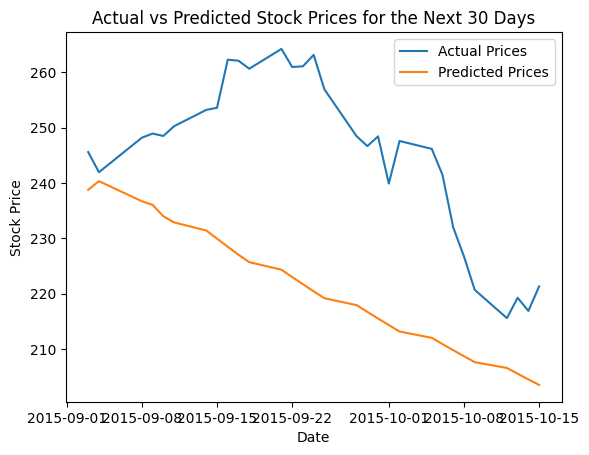

In [15]:
#plot the results
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+30], actual_future_prices, label='Actual Prices')
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+30], predicted_future_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
     

In [16]:
#Print actual and predicted prices for the next 30 days
for day in range(30):
    print(f"Day {day+1}: Actual: {actual_future_prices[day][0]}, Predicted: {predicted_future_prices[day][0]}")

Day 1: Actual: 245.570007, Predicted: 238.7567901611328
Day 2: Actual: 241.929993, Predicted: 240.31939697265625
Day 3: Actual: 248.169998, Predicted: 236.68504333496094
Day 4: Actual: 248.910004, Predicted: 236.0274200439453
Day 5: Actual: 248.479996, Predicted: 233.9733428955078
Day 6: Actual: 250.240005, Predicted: 232.86126708984375
Day 7: Actual: 253.190002, Predicted: 231.4016571044922
Day 8: Actual: 253.570007, Predicted: 229.9289093017578
Day 9: Actual: 262.25, Predicted: 228.4713897705078
Day 10: Actual: 262.070007, Predicted: 227.0177764892578
Day 11: Actual: 260.619995, Predicted: 225.68630981445312
Day 12: Actual: 264.200012, Predicted: 224.32911682128906
Day 13: Actual: 260.940002, Predicted: 222.99012756347656
Day 14: Actual: 261.059998, Predicted: 221.70204162597656
Day 15: Actual: 263.119995, Predicted: 220.4163818359375
Day 16: Actual: 256.910004, Predicted: 219.17269897460938
Day 17: Actual: 248.429993, Predicted: 217.92210388183594
Day 18: Actual: 246.649994, Predict